Collecting dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [11]:
data = pd.read_csv('/content/BostonHousing.csv')

In [12]:
print(data)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  price  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.14   21.6  
2       17.8

In [14]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [16]:
data.shape

(506, 14)

In [17]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
price      0
dtype: int64

In [18]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Understanding co-relation

In [19]:
correlation = data.corr()

<Axes: >

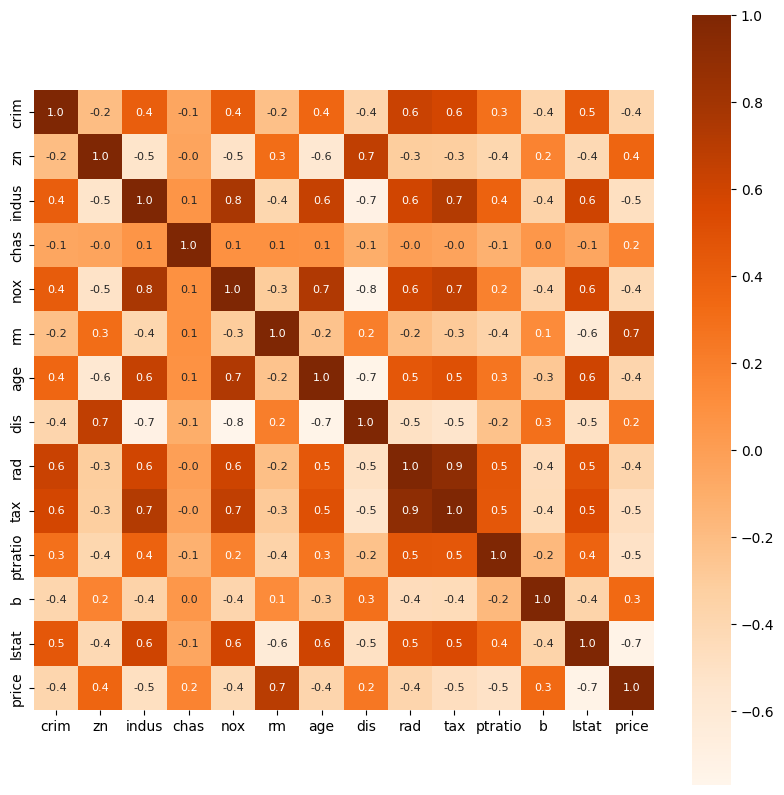

In [22]:
#constructing heatmap

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Oranges')

Splitting the data and Target

In [23]:
x = data.drop(['price'], axis = 1)
y = data['price']

Splitting the data into training and test data

In [24]:
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 3)

Model Training

XGBoost Regressor

In [25]:
#load the model
model = XGBRegressor()

In [26]:
model.fit(x_train , y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Accuracy score

In [30]:
training_prediction = model.predict(x_train)

print (training_prediction)

[14.890703  19.642195  35.400345  12.016242  20.381865  23.702316
 21.004805  50.00535   27.489727  12.681885  17.404818  23.786222
 22.894043  18.505577  30.301188  31.19518   16.000065  23.340284
 14.999737  10.195938  12.533196  19.588732  19.676384  19.53493
 14.997095  35.398685  13.5039215 20.58683   24.708351  21.901182
 17.090359  23.616112  21.102757  15.59351   18.517344   8.301923
 14.518146  23.914145  11.824473  24.599672  24.801905  18.732233
 17.899395  48.80669   13.015619  29.601875  18.004438  20.101824
 17.298218  23.106688  22.618582  13.792718  43.835552  35.205963
 22.610245  17.42741   48.506363  31.497694  15.606423  14.210823
 20.595139  22.02745   20.101086  17.591436  23.700542  14.104831
 19.799774  24.398348  33.40823   39.79762   34.915394  24.779575
 14.592391  23.363775  33.828697  23.888693   9.600326  21.75628
 31.609694  14.484305   7.1900516 24.100216  21.402494  17.213398
 46.000633  23.1129    14.500982  20.505697  16.986746  48.29493
 30.520454  2

In [31]:
#R squared error
rs = metrics.r2_score(y_train, training_prediction)

#mean absolute error
error = metrics.mean_absolute_error(y_train, training_prediction)

print("R squared error : ", rs)
print('Mean Absolute Error : ', error)

R squared error :  0.9999968327963358
Mean Absolute Error :  0.011230918676546346


Visualizing the actual price and predicted price

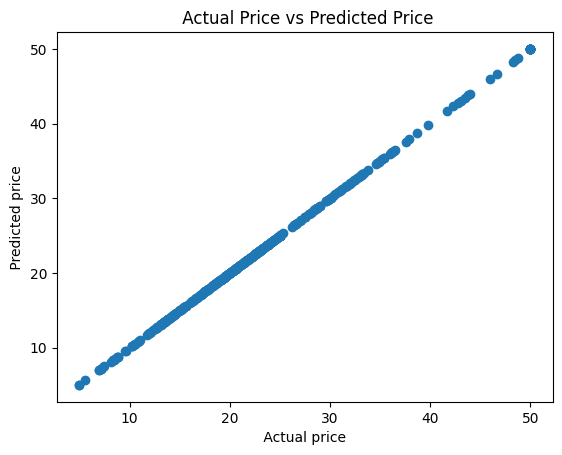

In [33]:
plt.scatter(y_train , training_prediction)
plt.xlabel (" Actual price ")
plt.ylabel ( " Predicted price ")
plt.title (" Actual Price vs Predicted Price")
plt.show()

In [35]:
test_prediction = model.predict(x_test)

print (test_prediction)

[43.45883   19.572275  14.657288  35.1135    22.413557  22.45688
 13.026672   7.0926595 21.686913  15.08685   17.180834  29.825008
 36.543423  25.639545   6.4372773 11.747016  20.455482  14.678311
 13.563187  22.610174  21.703295  48.1628    24.156927  25.077318
 12.5695715 23.896322  20.968372  21.717604  18.850376  21.80638
 14.804851  35.2015    18.031483  20.90929   19.04896   12.055547
 23.874678  35.53518   20.891949  22.556494  17.25001    9.2055025
 24.319355  17.773693  19.813871  24.968597  21.343317  16.146887
 27.364824  20.506569  26.744423  22.212511  48.073257  18.67338
 22.032778  17.85336   47.139416  15.135081  28.791925  19.372284
 19.933798  22.453901  34.87173   31.301466  21.095625  23.057304
 37.20883   22.489845  27.275482  25.572237  24.968668  25.325396
 17.76418   30.415586  10.434003  18.849157  18.846144  26.93238
 22.121193  16.270273  25.276384  14.925621  13.980819  21.267994
 24.046492  11.88136   25.399086  11.030102  20.194077  22.983921
 20.84213   2

In [36]:
#R squared error
rs = metrics.r2_score(y_test, test_prediction)

#mean absolute error
error = metrics.mean_absolute_error(y_test, test_prediction)

print("R squared error : ", rs)
print('Mean Absolute Error : ', error)

R squared error :  0.9022178792512646
Mean Absolute Error :  2.127565305373248


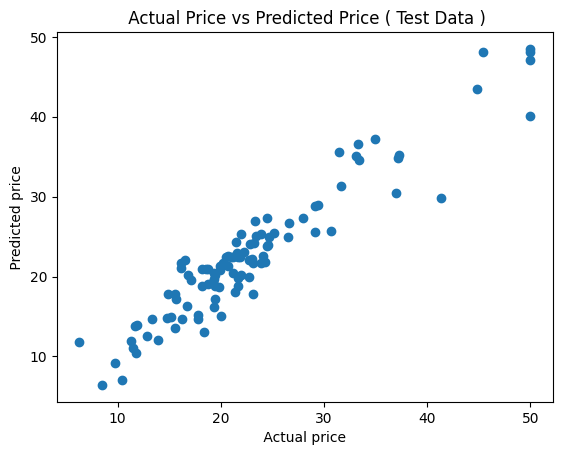

In [37]:
plt.scatter(y_test , test_prediction)
plt.xlabel (" Actual price ")
plt.ylabel ( " Predicted price ")
plt.title (" Actual Price vs Predicted Price ( Test Data )")
plt.show()